# Visualizing spatial data with Python

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

import matplotlib.pyplot as plt

In [2]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## GeoPandas visualization functionality

#### Basic plot

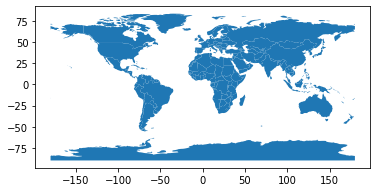

In [3]:
countries.plot()

#### Adjusting the figure size

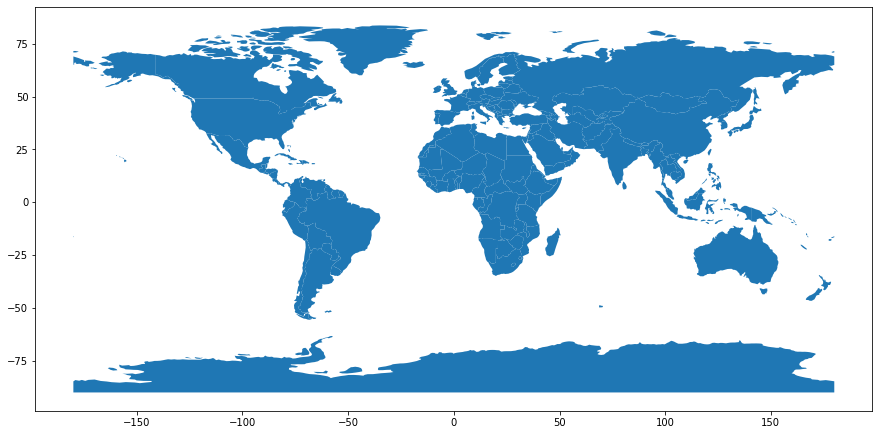

In [4]:
countries.plot(figsize=(15, 15))

#### Removing the box / x and y coordinate labels

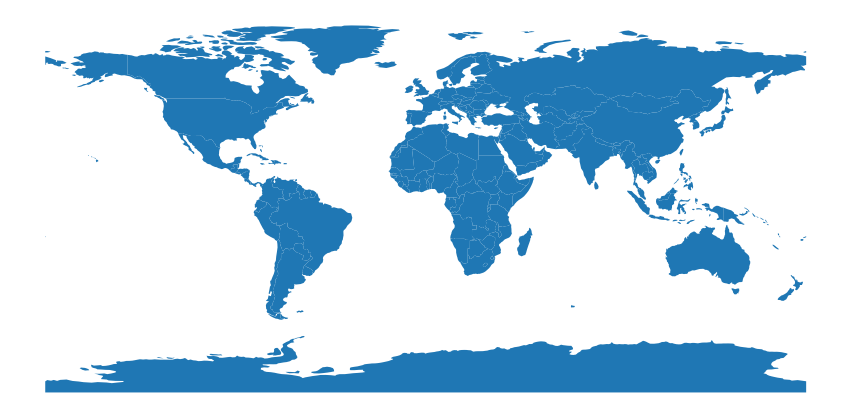

In [5]:
ax = countries.plot(figsize=(15, 15))
ax.set_axis_off()

#### Coloring based on column values

Let's first create a new column with the GDP per capita:

In [6]:
countries = countries[(countries['pop_est'] >0 ) & (countries['name'] != "Antarctica")]

In [7]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

and now we can use this column to color the polygons:

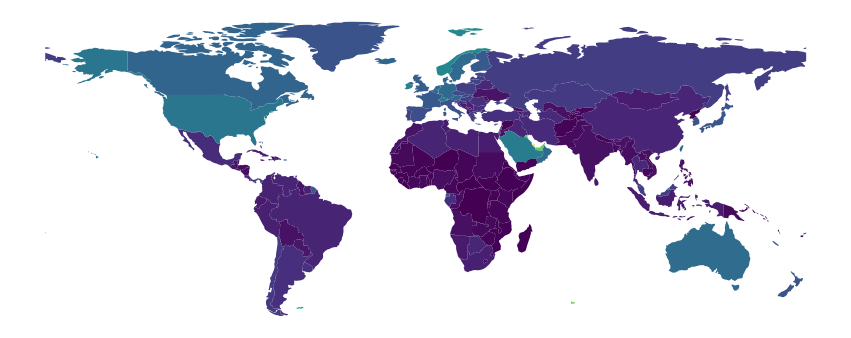

In [8]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap')
ax.set_axis_off()

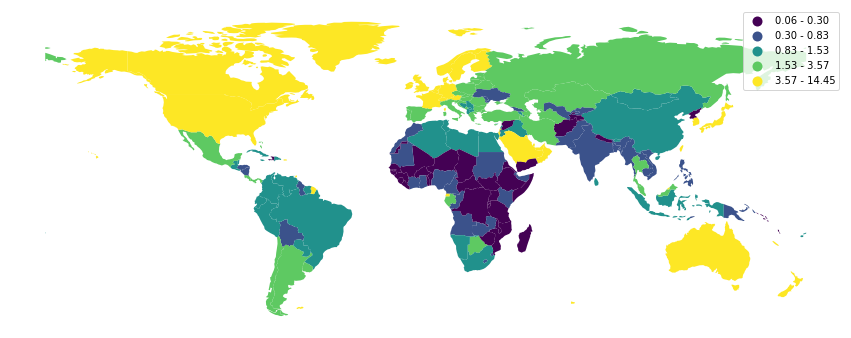

In [9]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap', scheme='quantiles', legend=True)
ax.set_axis_off()

#### Combining different dataframes on a single plot

The `.plot` method returns a matplotlib Axes object, which can then be re-used to add additional layers to that plot with the `ax=` keyword:

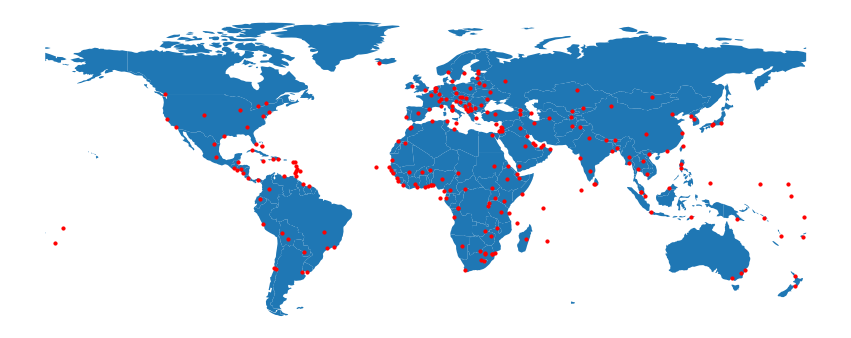

In [10]:
ax = countries.plot(figsize=(15, 15))
cities.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

[(0, 90), (0, 180)]

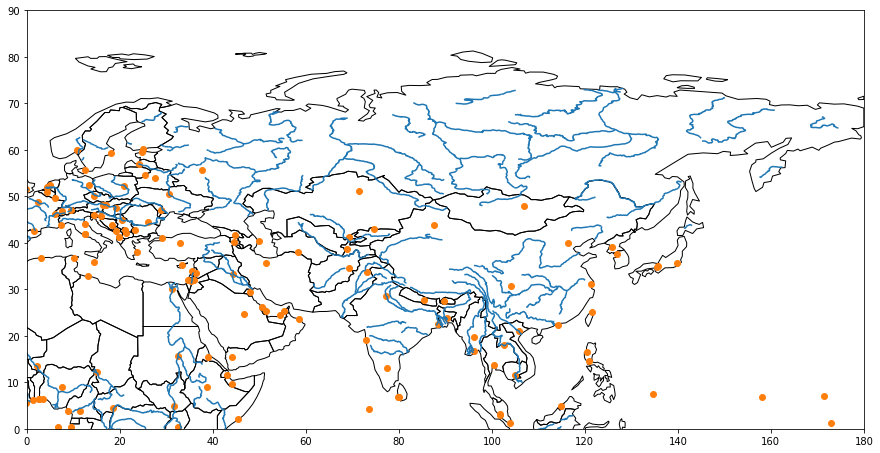

In [14]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='C1')
ax.set(xlim=(0, 180), ylim=(0, 90))

## Adding a background map with contextily

The contextily package allow to easily add a web-tile based backgroubd (basemap) to your GeoPandas plots.

Currently, the only requirement is that your data is already in the WebMercator projection (EPSG:3857).

In [15]:
# selecting the cities in Asia
cities_asia = cities[cities.within(countries[countries['continent'] == 'Asia'].unary_union)]

In [16]:
# converting to WebMercator
cities_asia2 = cities_asia.to_crs(epsg=3857)

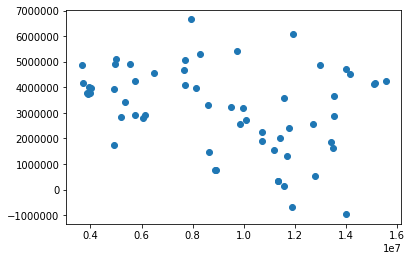

In [17]:
ax = cities_asia2.plot()

In [19]:
import contextily

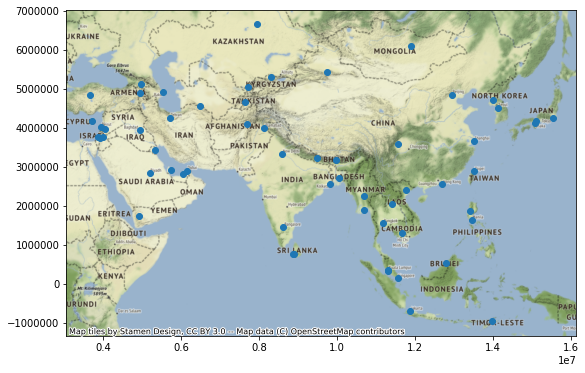

In [20]:
ax = cities_asia2.plot(figsize=(10, 6))
contextily.add_basemap(ax)

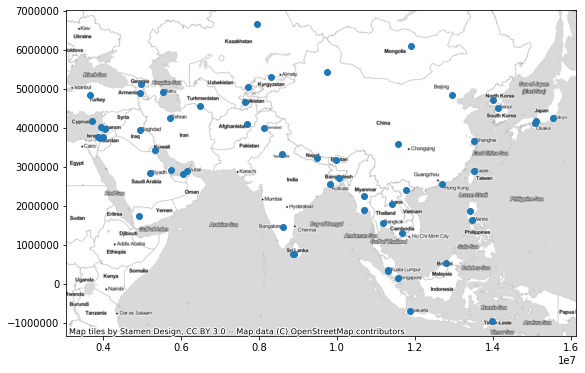

In [21]:
ax = cities_asia2.plot(figsize=(10, 6))
contextily.add_basemap(ax, url=contextily.providers.Stamen.TonerLite)